In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Gen AI - DEPI/Technical Tasks/BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

<Figure size 1200x800 with 0 Axes>

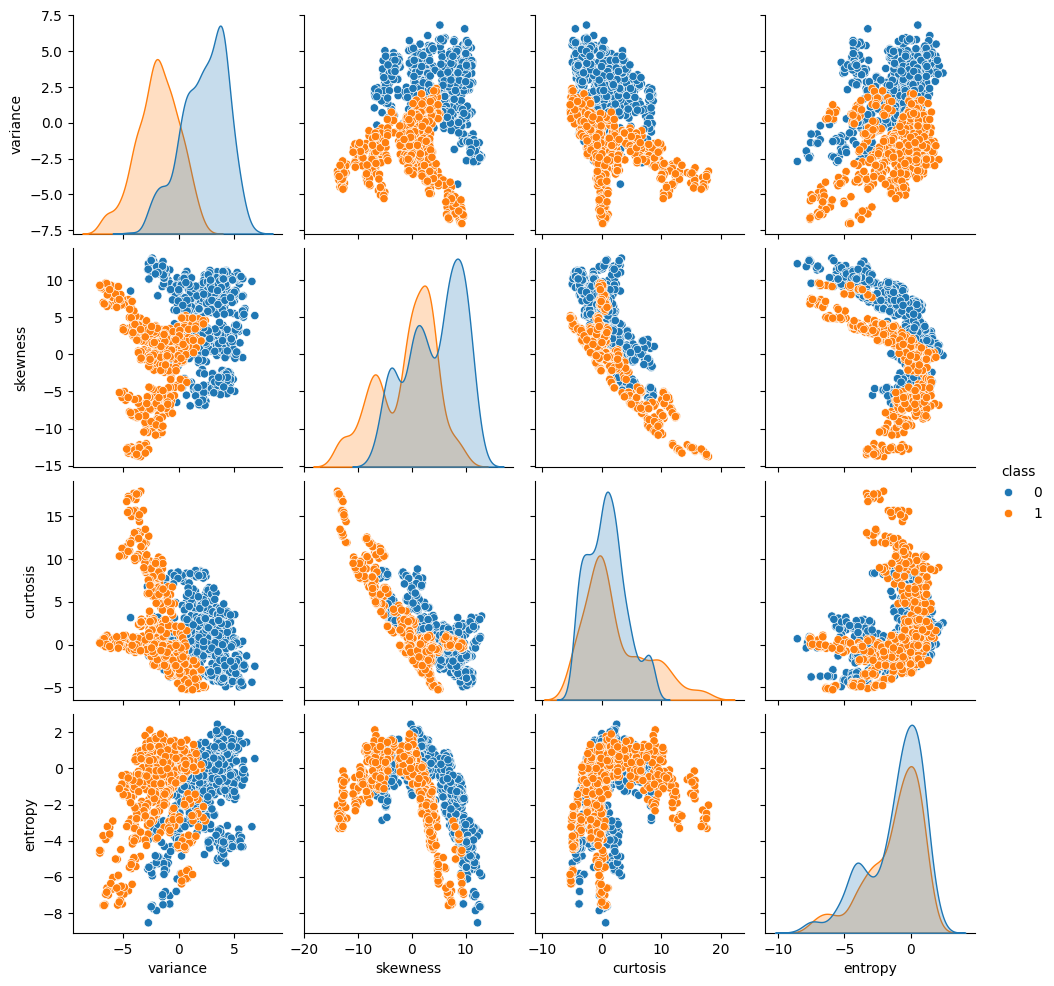

In [7]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='class')
plt.show()

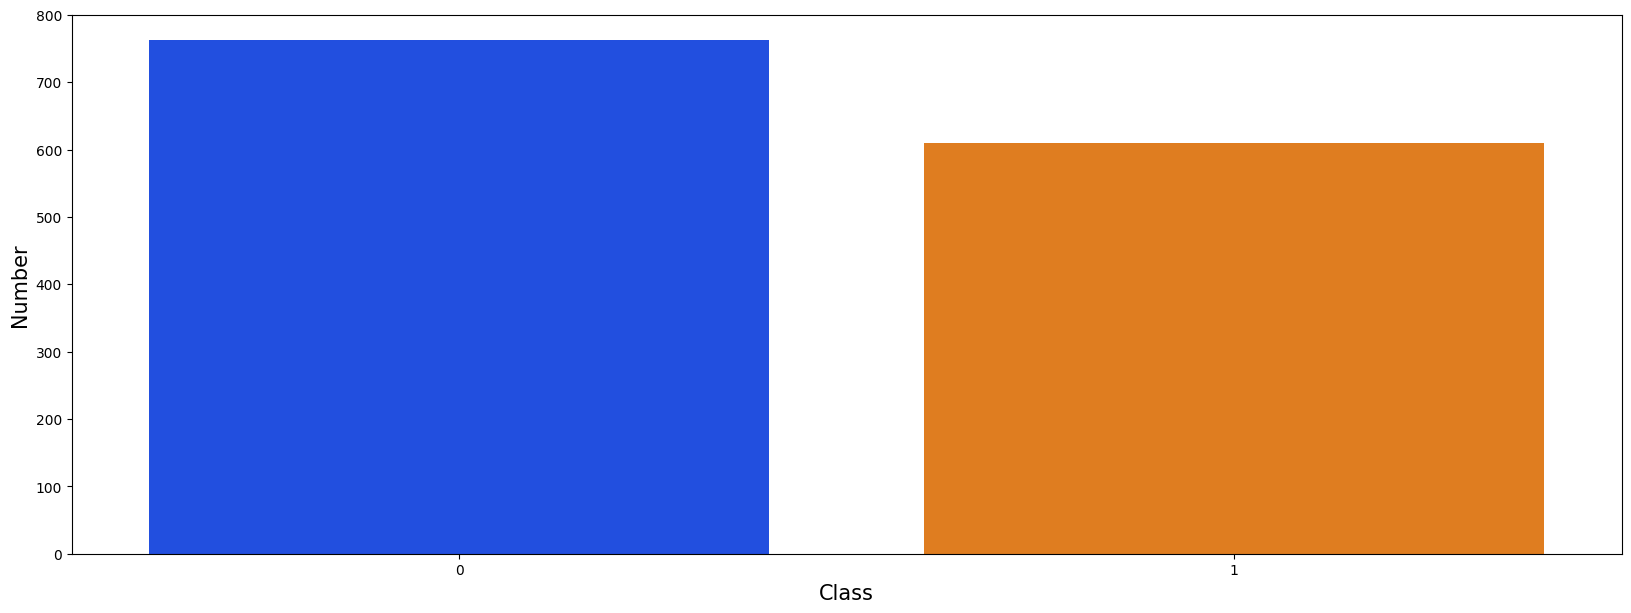

In [10]:
plt.figure(figsize=(20,7))

sns.countplot(data=df,x='class',palette='bright')
plt.xlabel('Class',fontsize=15)
plt.ylabel('Number',fontsize=15)
plt.show();

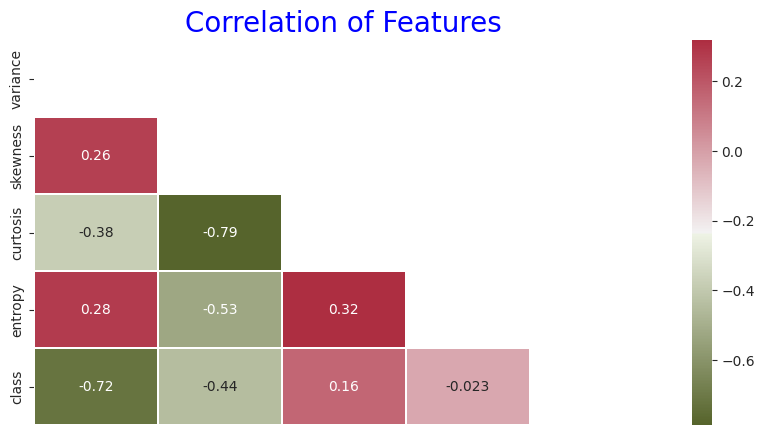

In [11]:
plt.figure(figsize=(10,5))
sns.set_style('ticks')
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)

corr = df.corr(numeric_only=True)
matrix = np.triu(corr)

sns.heatmap(corr,mask=matrix,cmap=cmap,annot=True,linewidths=0.2,xticklabels=False)
plt.title('Correlation of Features',fontdict={'size':20,'color':'blue'})

plt.show()

In [12]:
X = df.drop(columns=['class'])
y = df['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Classification

In [13]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [14]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

y_pred_log_reg = log_reg_model.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [15]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [17]:
nn_model = Sequential()
nn_model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")
print("Neural Network Classification Report:\n", classification_report(y_test, y_pred_nn))

Epoch 1/50
110/110 [==============================] - 3s 10ms/step - loss: 0.5180 - accuracy: 0.8040
Epoch 2/50
110/110 [==============================] - 0s 3ms/step - loss: 0.2765 - accuracy: 0.9535
Epoch 3/50
110/110 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9754
Epoch 4/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0816 - accuracy: 0.9827
Epoch 5/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9827
Epoch 6/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9836
Epoch 7/50
110/110 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9881
Epoch 8/50
110/110 [==============================] - 1s 6ms/step - loss: 0.0270 - accuracy: 0.9927
Epoch 9/50
110/110 [==============================] - 1s 5ms/step - loss: 0.0222 - accuracy: 0.9945
Epoch 10/50
110/110 [==============================] - 1s 10ms/step - loss: 0.0183 - accuracy: 0.99

#Clustering

In [16]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {silhouette_kmeans}")
print(f"K-Means Davies-Bouldin Score: {davies_bouldin_kmeans}")


K-Means Silhouette Score: 0.32905546282355036
K-Means Davies-Bouldin Score: 1.1999630554438148


In [18]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)
davies_bouldin_dbscan = davies_bouldin_score(X_scaled, dbscan_labels)
print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")
print(f"DBSCAN Davies-Bouldin Score: {davies_bouldin_dbscan}")


DBSCAN Silhouette Score: -0.037453903321425154
DBSCAN Davies-Bouldin Score: 1.1473564904777291


In [19]:
print("Summary of Classification Models:\n")
print("SVM:\n", classification_report(y_test, y_pred_svm))
print("Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Neural Network:\n", classification_report(y_test, y_pred_nn))

print("\nSummary of Clustering Models:\n")
print(f"K-Means Silhouette Score: {silhouette_kmeans}")
print(f"K-Means Davies-Bouldin Score: {davies_bouldin_kmeans}")
print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")
print(f"DBSCAN Davies-Bouldin Score: {davies_bouldin_dbscan}")


Summary of Classification Models:

SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275

Random Forest:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99      